In [1]:
### aasignment of text minning emotion minning ### on reviews 

In [3]:
import pandas as pd
import numpy as np 
from matplotlib.pyplot import imread
import spacy
import string
from matplotlib import pyplot as plt 
import afinn
from wordcloud import wordcloud
import nltk
%matplotlib inline 

In [4]:
data = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [5]:
data.head()

id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
1  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
2  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
3  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
4  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   

  primaryCategories                                          imageURLs  \
0   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
1   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
2   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
3   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
4   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   

                                                keys  ... reviews.didPurchase  \
0  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
1  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
2  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
3  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
4  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   

  reviews.doRecommend reviews.id reviews.numHelpful reviews.rating  \
0                 NaN        NaN                NaN              3   
1                 NaN        NaN                NaN              4   
2                 NaN        NaN                NaN              5   
3                 NaN        NaN                NaN              5   
4                 NaN        NaN                NaN              5   

                                  reviews.sourceURLs  \
0  https://www.amazon.com/product-reviews/B00QWO9...   
1  https://www.amazon.com/product-reviews/B00QWO9...   
2  https://www.amazon.com/product-reviews/B00QWO9...   
3  https://www.amazon.com/product-reviews/B00QWO9...   
4  https://www.amazon.com/product-reviews/B00QWO9...   

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  reviews.username  \
0  ... 3 of them and one of the item is bad quali...        Byger yang   
1  ... always the less expensive way to go for pr...              ByMG   
2  ... are not Duracell but for the price i am ha...  BySharon Lambert   
3  ... as well as name brand batteries at a much ...     Bymark sexson   
4  ... batteries are very long lasting the price ...           Bylinda   

                                          sourceURLs  
0  https://www.barcodable.com/upc/841710106442,ht...  
1  https://www.barcodable.com/upc/841710106442,ht...  
2  https://www.barcodable.com/upc/841710106442,ht...  
3  htt

In [29]:
data1=data.rename(columns={"reviews.text":'reviews'})

In [30]:
data1

id             dateAdded           dateUpdated  \
0      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
...                     ...                   ...                   ...   
28327  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28328  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28329  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28330  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28331  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   

                                                    name  \
0      AmazonBasics AAA Performance Alkaline Batterie...   
1      AmazonBasics AAA Performance Alkaline Batterie...   
2      AmazonBasics AAA Performance Alkaline Batterie...   
3      AmazonBasics AAA Performance Alkaline Batterie...   
4      AmazonBasics AAA Performance Alkaline Batterie...   
...                                                  ...   
28327  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28328  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28329  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28330  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28331  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   

                       asins         brand  \
0      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
1      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
2      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
3      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
4      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
...                      ...           ...   
28327             B018T075DC        Amazon   
28328             B018T075DC        Amazon   
28329             B018T075DC        Amazon   
28330             B018T075DC        Amazon   
28331             B018T075DC        Amazon   

                                              categories primaryCategories  \
0      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
...                                                  ...               ...   
28327  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28328  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28329  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28330  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28331  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   

                                               imageURLs  \
0      https://images-na.ssl-images-amazon.com/images...   
1      https://images-na.ssl-images-amazon.com/images...   
2      https://images-na.ssl-images-amazon.com/images...   
3      https://images-na.ssl-images-amazon.com/images...   
4      https://images-na.ssl-images-amazon.com/images...   
...                                                  ...   
28327  https://www.upccodesearch.com/images/barcode/0...   
28328  https://www.upccodesearch.com/images/barcode/0...   
28329  https://www.upccodesearch.com/images/barcode/0...   
28330  https://www.upccodesearch.com/images/barcode/0...   
28331  https://www.upccodesearch.com/images/barcode/0...   

                                                    keys  ...  \
0      amazonbasics/hl002619,amazonbasicsaaaperforman...  ...   
1      amazonbasics/hl002619,amazonbasicsaaaperforman...  ... 

In [31]:
data1.shape

(28332, 24)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [33]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

In [58]:
book=pd.DataFrame(data1.reviews)

In [59]:
book

reviews
0      I order 3 of them and one of the item is bad q...
1      Bulk is always the less expensive way to go fo...
2      Well they are not Duracell but for the price i...
3      Seem to work as well as name brand batteries a...
4      These batteries are very long lasting the pric...
...                                                  ...
28327  I got 2 of these for my 8 yr old twins. My 11 ...
28328  I bought this for my niece for a Christmas gif...
28329  Very nice for light internet browsing, keeping...
28330  This Tablet does absolutely everything I want!...
28331  At ninety dollars, the expectionations are low...

[28332 rows x 1 columns]

In [34]:
#emotion minning
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
 

In [35]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [60]:
book = [reviews.strip() for reviews in book.reviews] # remove both the leading and the trailing characters
book = [reviews for reviews in book if reviews] # removes empty strings, because they are considered in Python as False 

In [108]:
### tokenization 
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[:45]

['I order 3 of them and one of the item is bad quality.',
 'Is missing backup spring so I have to put a pcs of aluminum to make the battery work.',
 'Bulk is always the less expensive way to go for products like these Well they are not Duracell but for the price i am happy.',
 'Seem to work as well as name brand batteries at a much better price These batteries are very long lasting the price is great.',
 'Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good.',
 "I haven't noticed a difference between the brand name batteries and the Amazon Basic brand.",
 'Just a lot easier to purchase and have arrive at the house and have on hand.',
 'Will buy again.',
 'ive not had any problame with these batteries have ordered them in the past been very pleased.',
 'Well if you are looking for cheap non-rechargeable batteries that last quite a while then these are perfect.',
 'Nothing more to say.',
 'These do not hold the amount of high power juice like energizer or dura

In [109]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

sentence
0      I order 3 of them and one of the item is bad q...
1      Is missing backup spring so I have to put a pc...
2      Bulk is always the less expensive way to go fo...
3      Seem to work as well as name brand batteries a...
4      Bought a lot of batteries for Christmas and th...
...                                                  ...
57641  I can watch TV Shows or Movies, check my Mail,...
57642      It processes fast and has a beautiful screen.
57643  As I said: Everything I want in a Tablet for l...
57644  At ninety dollars, the expectionations are low...
57645  Overall this is a good tablet for $90, I would...

[57646 rows x 1 columns]

In [110]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [111]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [112]:
# test that it works
calculate_sentiment(text = 'awesome') 

4

In [113]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [114]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    13
1    18
2    25
3    24
4    14
5    15
6    16
7     3
8    17
9    18
Name: word_count, dtype: int64

In [115]:
sent_df 

sentence  sentiment_value  \
0      I order 3 of them and one of the item is bad q...               -3   
1      Is missing backup spring so I have to put a pc...               -2   
2      Bulk is always the less expensive way to go fo...                5   
3      Seem to work as well as name brand batteries a...                3   
4      Bought a lot of batteries for Christmas and th...                3   
...                                                  ...              ...   
57641  I can watch TV Shows or Movies, check my Mail,...               -1   
57642      It processes fast and has a beautiful screen.                3   
57643  As I said: Everything I want in a Tablet for l...                1   
57644  At ninety dollars, the expectionations are low...                8   
57645  Overall this is a good tablet for $90, I would...                5   

       word_count  
0              13  
1              18  
2              25  
3              24  
4              14  
...           ...  
57641          15  
57642           8  
57643          13  
57644          43  
57645          17  

[57646 rows x 3 columns]

In [116]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
9696   All were dead Alot of the batteries were dead ...              -17   
17633  I would say that about half of these batteries...              -14   
9614   I would say that about half of these batteries...              -14   
15081  no problems No problems No problems No problem...              -12   
39670  I can only compare my Fire HD 8 16 GB (2017) t...              -12   
...                                                  ...              ...   
3678   Great value Great value Great value great valu...               75   
14643  Good GOOD good good good good Good Good good G...               79   
3488   Great price great price Great price great pric...               87   
3112   good good good Good good good GOOD good good G...              141   
3297   graat buy... Grandson has a blast with this gr...              162   

       word_count  
9696           46  
17633          24  
9614           24  
15081          11  
39670         216  
...           ...  
3678           51  
14643          34  
3488           79  
3112           49  
3297           73  

[57646 rows x 3 columns]

In [117]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    57646.000000
mean         1.852947
std          3.089226
min        -17.000000
25%          0.000000
50%          2.000000
75%          3.000000
max        162.000000
Name: sentiment_value, dtype: float64

In [118]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0      I order 3 of them and one of the item is bad q...               -3   
1      Is missing backup spring so I have to put a pc...               -2   
5      I haven't noticed a difference between the bra...                0   
7                                        Will buy again.                0   
10                                  Nothing more to say.                0   
...                                                  ...              ...   
57633            I got 2 of these for my 8 yr old twins.                0   
57634       My 11 yr old has one but this one is better.                0   
57638  Very relaxing to sit in a comfy chair and read...                0   
57639  Has given me hours of enjoyment and informatio...                0   
57641  I can watch TV Shows or Movies, check my Mail,...               -1   

       word_count  
0              13  
1              18  
5              15  
7               3  
10              4  
...           ...  
57633          11  
57634          11  
57638          12  
57639          12  
57641          15  

[24368 rows x 3 columns]

In [119]:
sent_df[sent_df['sentiment_value']>=10]

sentence  sentiment_value  \
22     just got em so I can't really comment on how g...               14   
40     These do not last long at all very cheap batte...               11   
124    If you don't go through a lot of batteries org...               10   
149    A battery is a battery these work just as good...               10   
584    Perfectly sent perfectly usable Amazon batteri...               12   
...                                                  ...              ...   
57063  Love the Fire, the picture is good and really ...               11   
57123  Not a good product short battery life i can on...               12   
57249  My son loves it for reading books from library...               11   
57501  She loves it, as it does basically everything ...               13   
57593  Definitely an amazing deal at an amazing price...               22   

       word_count  
22             72  
40             77  
124            57  
149            33  
584            13  
...           ...  
57063          18  
57123          45  
57249          31  
57501          35  
57593          91  

[912 rows x 3 columns]

In [120]:
sent_df['index']=range(0,len(sent_df)) 

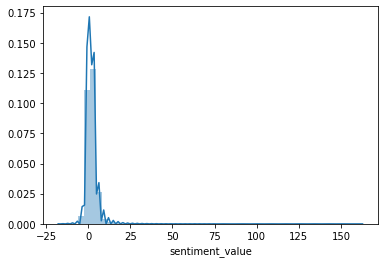

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

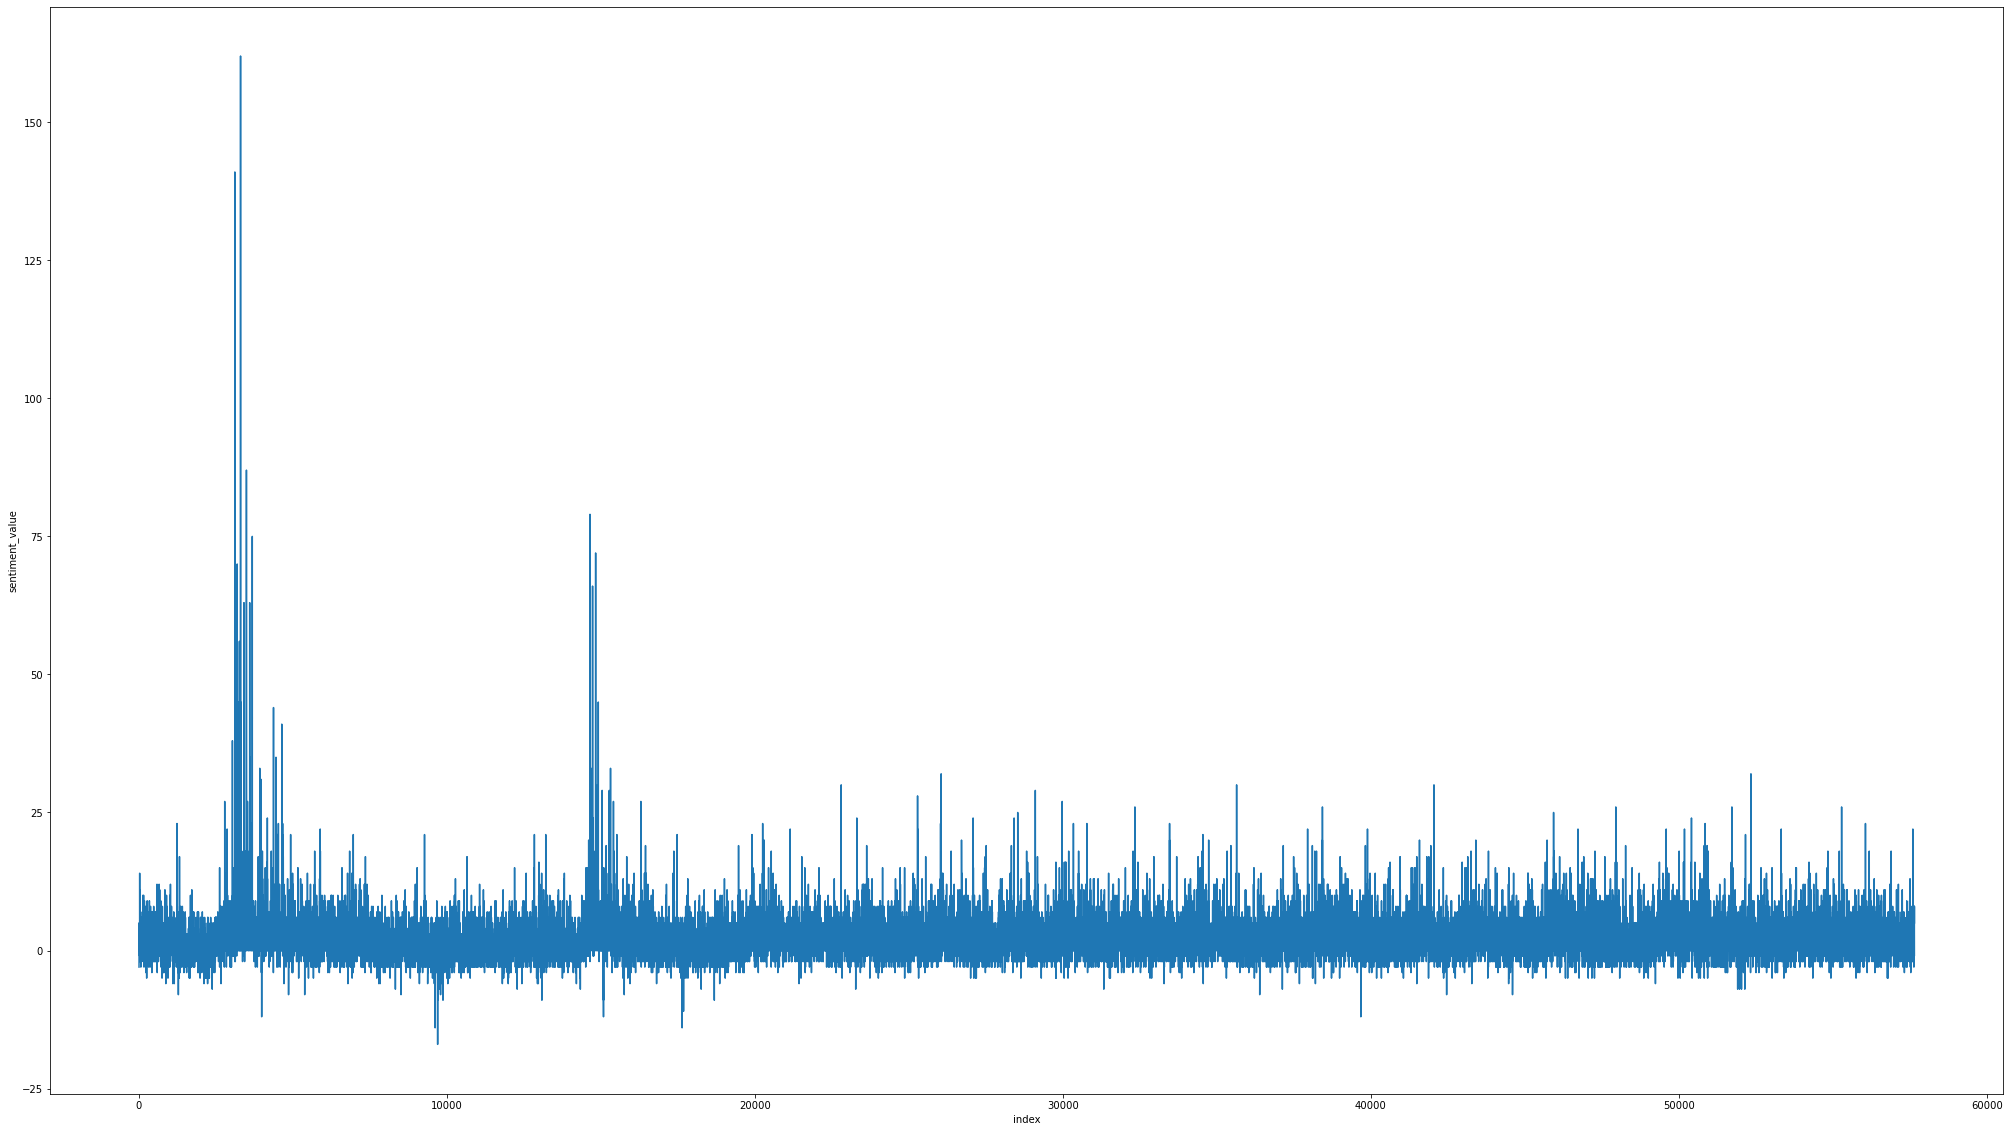

In [122]:
plt.figure(figsize=(35, 20))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

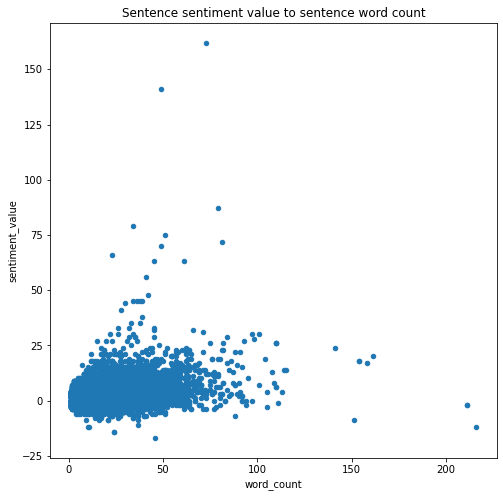

In [123]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [79]:
#### TEXT PROCESSING AND FEATURE EXTRACTION ### 

In [124]:
# Joining the list into one string/text
text = ' '.join(book)
text 

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work. Bulk is always the less expensive way to go for products like these Well they are not Duracell but for the price i am happy. Seem to work as well as name brand batteries at a much better price These batteries are very long lasting the price is great. Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven\'t noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again. ive not had any problame with these batteries have ordered them in the past been very pleased. Well if you are looking for cheap non-rechargeable batteries that last quite a while then these are perfect. Nothing more to say. These do not hold the amount of high power juice like energizer or duracell, but they are half the price. AmazonBas

In [125]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'I order 3 of them and one of the item is bad quality Is missing backup spring so I have to put a pcs of aluminum to make the battery work Bulk is always the less expensive way to go for products like these Well they are not Duracell but for the price i am happy Seem to work as well as name brand batteries at a much better price These batteries are very long lasting the price is great Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good I havent noticed a difference between the brand name batteries and the Amazon Basic brand Just a lot easier to purchase and have arrive at the house and have on hand Will buy again ive not had any problame with these batteries have ordered them in the past been very pleased Well if you are looking for cheap nonrechargeable batteries that last quite a while then these are perfect Nothing more to say These do not hold the amount of high power juice like energizer or duracell but they are half the price AmazonBasics AA AAA batte

In [126]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50]) 

['I', 'order', '3', 'of', 'them', 'and', 'one', 'of', 'the', 'item', 'is', 'bad', 'quality', 'Is', 'missing', 'backup', 'spring', 'so', 'I', 'have', 'to', 'put', 'a', 'pcs', 'of', 'aluminum', 'to', 'make', 'the', 'battery', 'work', 'Bulk', 'is', 'always', 'the', 'less', 'expensive', 'way', 'to', 'go', 'for', 'products', 'like', 'these', 'Well', 'they', 'are', 'not', 'Duracell', 'but']


In [127]:
len(text_tokens) 

733035

In [128]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:25]) 

['I', 'order', '3', 'one', 'item', 'bad', 'quality', 'Is', 'missing', 'backup', 'spring', 'I', 'put', 'pcs', 'aluminum', 'make', 'battery', 'work', 'Bulk', 'always', 'less', 'expensive', 'way', 'go', 'products']


In [129]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50]) 

['i', 'order', '3', 'one', 'item', 'bad', 'quality', 'is', 'missing', 'backup', 'spring', 'i', 'put', 'pcs', 'aluminum', 'make', 'battery', 'work', 'bulk', 'always', 'less', 'expensive', 'way', 'go', 'products', 'like', 'well', 'duracell', 'price', 'happy', 'seem', 'work', 'well', 'name', 'brand', 'batteries', 'much', 'better', 'price', 'these', 'batteries', 'long', 'lasting', 'price', 'great', 'bought', 'lot', 'batteries', 'christmas', 'amazonbasics']


In [130]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:25])

['i', 'order', '3', 'one', 'item', 'bad', 'qualiti', 'is', 'miss', 'backup', 'spring', 'i', 'put', 'pc', 'aluminum', 'make', 'batteri', 'work', 'bulk', 'alway', 'less', 'expens', 'way', 'go', 'product']


In [131]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [132]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))


ValueError: [E088] Text of length 2645014 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [98]:
len(text)

3924466